In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import biopsykit as bp

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from fau_colors import register_cmaps
register_cmaps()

sns.set_theme(context="poster", style="white", palette="faculties", font_scale=1.2)

%matplotlib widget

In [4]:
from sleep_analysis.preprocessing.utils import extract_edf_channel
from sleep_analysis.preprocessing.mesa_dataset.edr import _extract_edr
import json
from sleep_analysis.feature_extraction.rrv import process_resp, extract_rrv_features_helper


In [5]:
with open(Path.cwd().parents[2].joinpath("study_data.json")) as f:
    path_dict = json.load(f)
    edf_path = Path(path_dict["mesa_path"]).joinpath("polysomnography/edfs")
    processed_mesa_path = Path(path_dict["processed_mesa_path"])



# EDR

In [6]:
raw_ecg, epochs = extract_edf_channel(edf_path, subj_id=int(1), channel="EKG")

Extracting EDF parameters from /Users/danielkrauss/code/MA_Daniel_Krauss/data/mesa/polysomnography/edfs/mesa-sleep-0001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [7]:
downsample_ecg = bp.utils.array_handling.downsample(np.asarray(raw_ecg), 256, 32)
downsample_ecg = pd.DataFrame(downsample_ecg).rename(columns={0: "ECG"})

In [8]:
edr_signal = _extract_edr(raw_ecg, sampling_rate=256)
edr_df, epochs = process_resp(edr_signal.respiratory_signal, epochs)

  0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
edr_df = edr_df.rename(columns={0: "EDR"})

# Thor

In [10]:
resp_df, epochs = extract_edf_channel(edf_path, subj_id=int(1), channel="Thor")

Extracting EDF parameters from /Users/danielkrauss/code/MA_Daniel_Krauss/data/mesa/polysomnography/edfs/mesa-sleep-0001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [11]:
resp_df, epochs = process_resp(resp_df, epochs)

In [12]:
resp_df = resp_df.rename(columns={0: "Respiration"})

# Plotting

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93336/47736095.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=30)


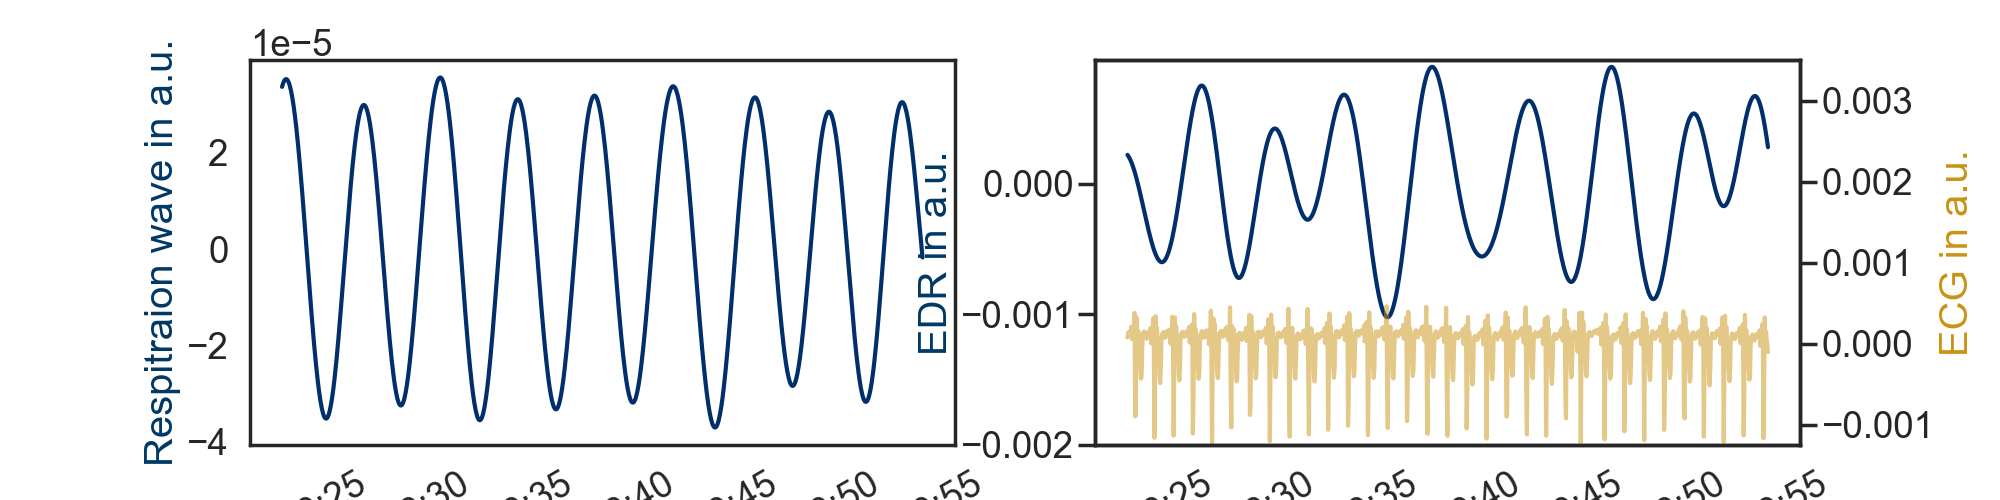

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=((20,5)))
sns.lineplot(x = resp_df[500000:501000].index, y = resp_df[500000:501000]["Respiration"], ax = axs[0])
sns.lineplot(x = edr_df[500000:501000].index, y = edr_df[500000:501000]["EDR"], ax=axs[1])
ax_2 = axs[1].twinx()
sns.lineplot(x = edr_df[500000:501000].index, y=downsample_ecg[500000:501000]["ECG"], ax = ax_2, alpha=0.5, color = "#c99313")
ax_2.set_ylim(-0.00125, 0.0035)
axs[1].set_ylim(-0.002,0.00095)
#axs[0].set_title("Respiration wave recorded via a thoracic belt")
#axs[1].set_title("Respiration wave extracted from ECG via EDR")
axs[0].set_ylabel("Respitraion wave in a.u.", color = "#003865")
axs[1].set_ylabel("EDR in a.u.", color = "#003865")
ax_2.set_ylabel("ECG in a.u.", color = "#c99313")
for ax in axs:
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels, rotation=30)

#Don't save anymore because its an old image
#plt.savefig("edr_extraction.pdf", format="pdf", bbox_inches="tight")

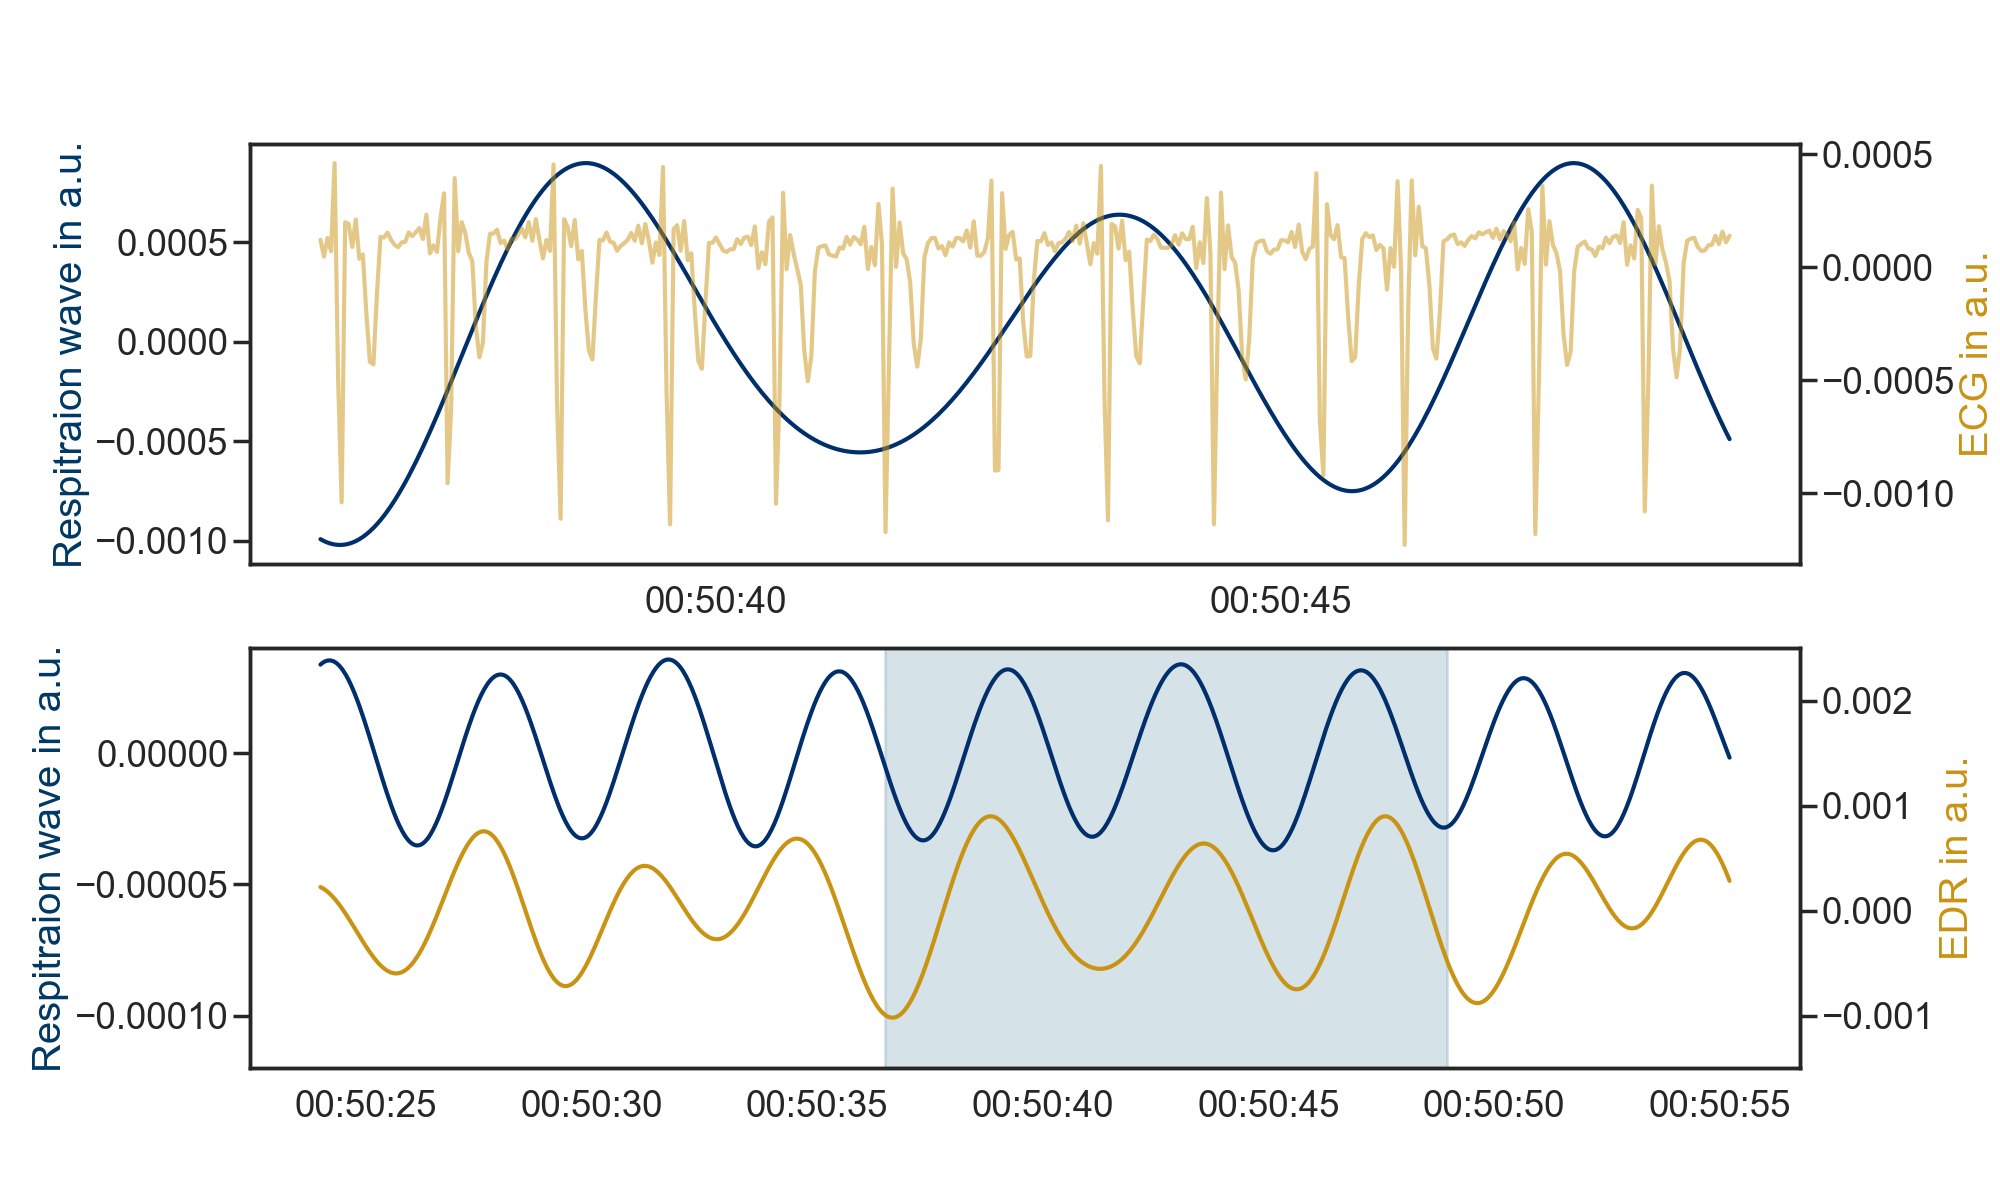

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=((20,12)))

sns.lineplot(x = edr_df[500400:500800].index, y = edr_df[500400:500800]["EDR"], ax=axs[0])
ax_1 = axs[0].twinx()
sns.lineplot(x = edr_df[500400:500800].index, y=downsample_ecg[500400:500800]["ECG"], ax = ax_1, alpha=0.5, color = "#c99313")

sns.lineplot(x = resp_df[500000:501000].index, y = resp_df[500000:501000]["Respiration"], ax = axs[1])
ax_2 = axs[1].twinx()
sns.lineplot(x = edr_df[500000:501000].index, y = edr_df[500000:501000]["EDR"], ax=ax_2, color = "#c99313")

ax=axs[1].axvspan("1985-01-02 00:50:36.500000", '1985-01-02 00:50:48.968750016', color="#779FB5", alpha=0.3)

axs[1].set_ylim(-0.00012,0.00004)
ax_2.set_ylim(-0.0015, 0.0025)

axs[0].set_ylabel("Respitraion wave in a.u.", color = "#003865")
axs[1].set_ylabel("Respitraion wave in a.u.", color = "#003865")
ax_1.set_ylabel("ECG in a.u.", color = "#c99313")
ax_2.set_ylabel("EDR in a.u.", color = "#c99313")

plt.savefig("edr_extraction.pdf", format="pdf", bbox_inches="tight")